In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
# some columns have 0 values it's wrong they shouldn't have 0 values, should be replaced

In [12]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

<Axes: >

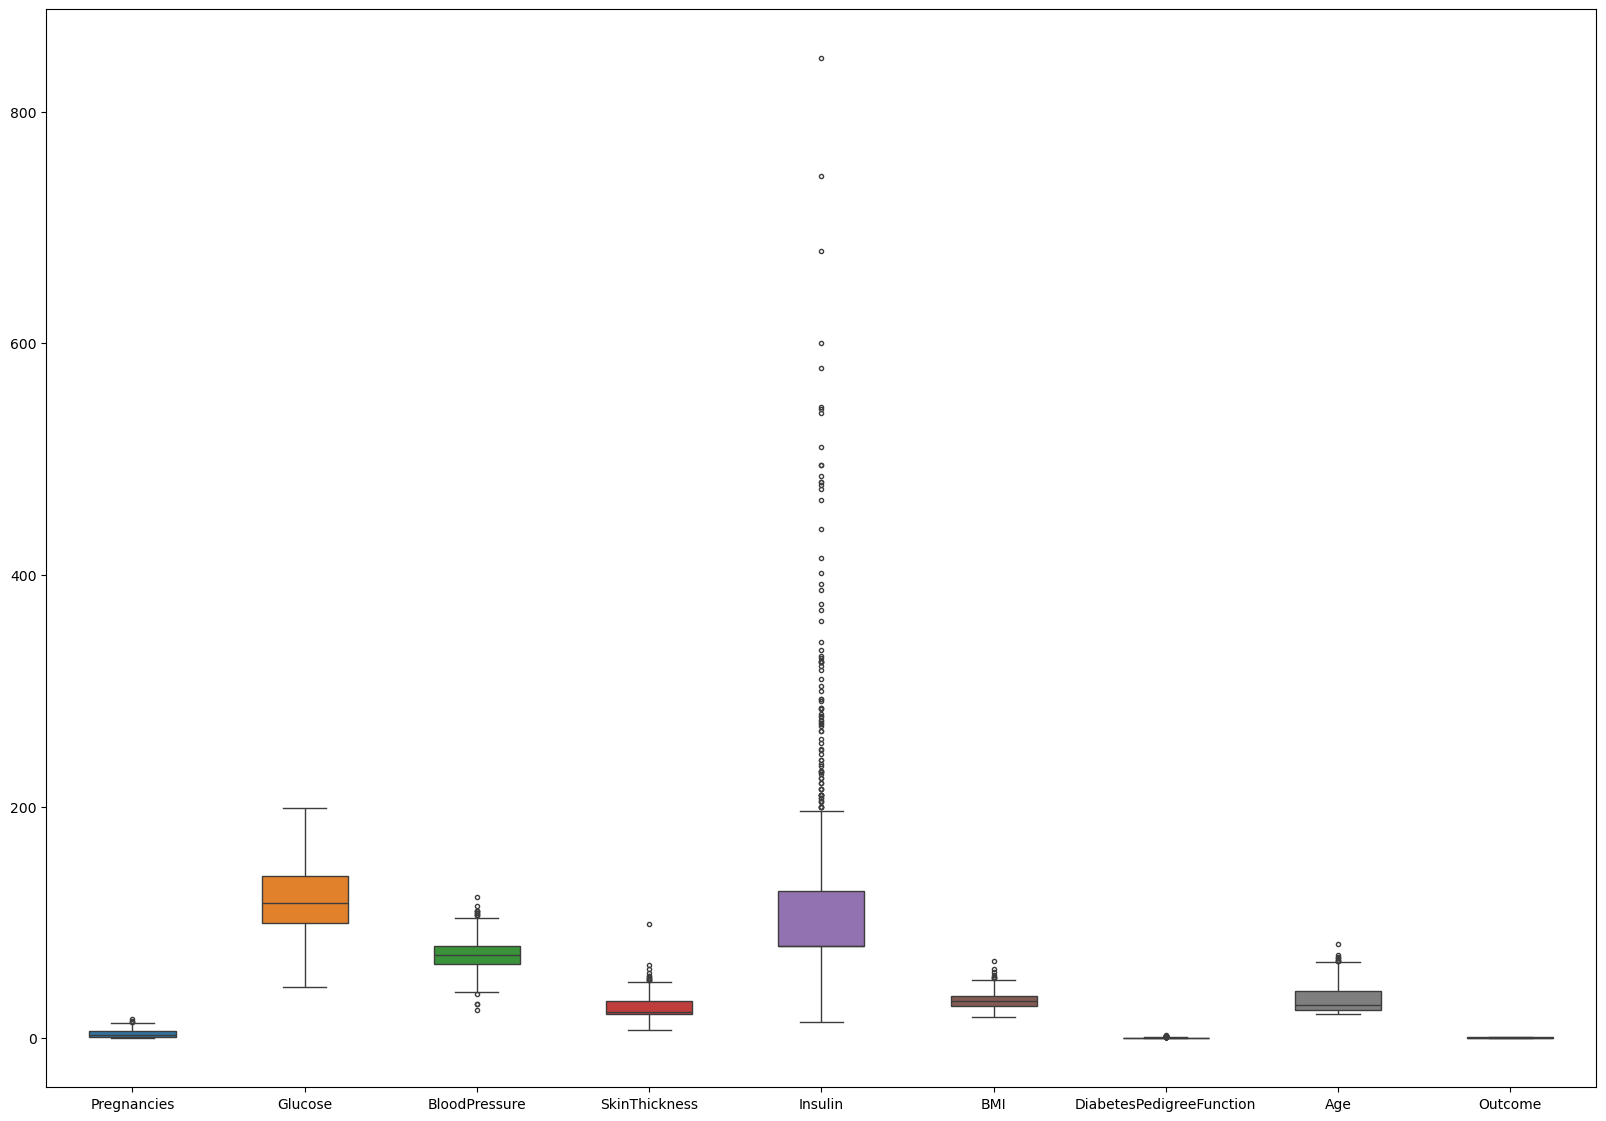

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,14))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)

In [27]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [36]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)

LogisticRegression()

In [37]:
y_pred = LR.predict(X_test_scaled)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.796875

In [39]:
# hyperparameter tuning
parameters = {'penalty': ['l1','l2'],
              'C': np.logspace(-3,3,7),
              'solver': ['newton-cg', 'lbfgs', 'liblinear']
             }

In [95]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

LogReg = LogisticRegression()
LogReg_CV = GridSearchCV(LogReg, param_grid = parameters, scoring='accuracy', cv=5)

In [96]:
LogReg_CV.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [97]:
LogReg_CV.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [98]:
LogReg_CV.best_score_

0.7725487256371812

In [99]:
y_pred_cv = LogReg_CV.predict(X_test_scaled)

In [100]:
accuracy_score(y_test, y_pred_cv)

0.796875

In [101]:
# LR
accuracy_score(y_test, y_pred)

0.796875

In [102]:
confusion_matrix(y_test, y_pred)

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [57]:
ypred_dt = dt.predict(X_test_scaled)

In [58]:
accuracy_score(y_test, ypred_dt)

0.7604166666666666

In [108]:
# hyperparameter tuning
param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10],
    'max_features':['auto','sqrt','log2']
}

In [121]:
dtc = DecisionTreeClassifier()
dt_cv = GridSearchCV(dtc, param_grid=param_grid, scoring='accuracy', verbose=3, cv=10)

In [122]:
dt_cv.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV 1/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, s

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [123]:
dt_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [124]:
dt_cv.best_score_

0.7307924984875982

In [125]:
ypred_dtc = LR.predict(X_test_scaled)

In [126]:
accuracy_score(y_test, ypred_dtc)

0.796875